<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Text-Processing" data-toc-modified-id="Text-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Text Processing</a></span><ul class="toc-item"><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Stopwords-handling" data-toc-modified-id="Stopwords-handling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Stopwords handling</a></span></li><li><span><a href="#Lemmatization" data-toc-modified-id="Lemmatization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lemmatization</a></span></li><li><span><a href="#Create-a-new-dataframe-with-clean-text" data-toc-modified-id="Create-a-new-dataframe-with-clean-text-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Create a new dataframe with clean text</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Prepare-train,-validation-and-test-set" data-toc-modified-id="Prepare-train,-validation-and-test-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prepare train, validation and test set</a></span></li><li><span><a href="#Note-on-Vectorization" data-toc-modified-id="Note-on-Vectorization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Note on Vectorization</a></span></li><li><span><a href="#Note-on-N-grams" data-toc-modified-id="Note-on-N-grams-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Note on N-grams</a></span></li><li><span><a href="#Unigrams-Modeling" data-toc-modified-id="Unigrams-Modeling-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Unigrams Modeling</a></span></li><li><span><a href="#Bigrams-Modeling" data-toc-modified-id="Bigrams-Modeling-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Bigrams Modeling</a></span></li><li><span><a href="#Modeling-with-Convolutional-Neural-Network---Deep-learning" data-toc-modified-id="Modeling-with-Convolutional-Neural-Network---Deep-learning-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Modeling with Convolutional Neural Network - Deep learning</a></span></li></ul></li></ul></div>

# Introduction

This dataset contains CSV versions of the Large Movie Review dataset by Maas, et al. (2011) from its original Stanford AI Repository. It contains 50k highly polar movie reviews, evenly split to 25k positives and 25k negatives. Each sample is labeled with a 0 (positive) or 1 (negative). The additional ~11k unlabeled review data has also been included in CSV format for your convenience.

# Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import itertools

#Specific library for NLP needs
import nltk
import spacy
import re
import string #list of punctuation

from collections import Counter #to create dictionary with key = word and value = count number

#For convolutional neural network
# from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model


#Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


#Text processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer


#Split data into train sample and test sample
from sklearn.model_selection import train_test_split

#Print result of model quality check
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, classification_report

#Validation set and Cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#Create a pipeline for the whole process
from sklearn.pipeline import Pipeline

#Export model and open model
import pickle


import warnings
warnings.simplefilter('ignore')



# Import Data

In [3]:
df=pd.read_csv('D:/Documents/Ironhack/Projet 7/Data/train/train.csv')

In [4]:
df.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

# Text Processing

The standard text mining procedures are to extract useful features from the news contents, including tokenization, removing stopwords, and lemmatization.

In order to visualize what we do in each step with the text, we will create, for the result of each step, a column so that we can compare the change of the text between different version.

## Tokenization

The first step of preprocessing text data is to break every sentence into individual words, which is called tokenization. Taking individual words rather than sentences breaks down the connections between words. However, it is a common method used to analyze large sets of text data. It is efficient and convenient for computers to analyze the text data by examines what words appear in an article and how many times these words appear, and is sufficient enough to give insightful results.

In [7]:
# An example of the review
df['text'][100]


"Sure, it was cheesy and nonsensical and at times corny, but at least the filmmakers didn't try. While most TV movies border on the brink of mediocrity, this film actually has some redeeming qualities to it. The cinematography was pretty good for a TV film, and Viggo Mortensen displays shades of Aragorn in a film about a man who played by his own rules. Most of the flashback sequences were kind of cheesy, but the scene with the mountain lion was intense. I was kind of annoyed by Jason Priestly's role in the film as a rebellious shock-jock, but then again, it's a TV MOVIE! Despite all of the good things, the soundtrack was atrocious. However, it was nice to see Tucson, Arizona prominently featured in the film."

In [8]:
#Define our function to tokenize each review

def tonkenization(text):
    #break down sentence into list of seperate words and characters
    words = word_tokenize(text)
    
    #remove all punctuation
    words = [char for char in words if char not in string.punctuation]

    #remove all characters'names, movies' names recognised by the uppecase -> to see if it is necessary because it could remove other words than names too
    words = [word for word in words if word.islower()]
    
    #remove digits and other symbols
    words = [re.sub(r"[^A-Za-z]", "", word) for word in words]
    
    # filter out short tokens
    words = [word for word in words if len(word) > 1]
    
    #remove emtpy space
    words = [word for word in words if word !='']
    
    #combine a list into one string   
    text_token = ' '.join(words)
    
    return text_token

    
    

In [9]:
#Test our function
tonkenization(df['text'][100])

'it was cheesy and nonsensical and at times corny but at least the filmmakers did nt try most movies border on the brink of mediocrity this film actually has some redeeming qualities to it cinematography was pretty good for film and displays shades of in film about man who played by his own rules of the flashback sequences were kind of cheesy but the scene with the mountain lion was intense was kind of annoyed by role in the film as rebellious shockjock but then again it all of the good things the soundtrack was atrocious it was nice to see prominently featured in the film'

## Stopwords handling

Stopwords are words that frequently appear in many articles, but without significant meanings. Examples of stopwords are ‘I’, ‘the’, ‘a’, ‘of’. These are the words that will not intervene in the understanding of articles if removed.

In [10]:
# Define a function that remove all stopwords in english from the token
def no_stopwords(text):
    list_words = text.split()
    nostopwords = [word for word in list_words if word not in stopwords.words('english')]
    
    #combine a list into one string   
    text_nostopwords = ' '.join(nostopwords)   
    
    return text_nostopwords
    

In [11]:
#Test function stopwords
print(no_stopwords(tonkenization(df['text'][100])))

cheesy nonsensical times corny least filmmakers nt try movies border brink mediocrity film actually redeeming qualities cinematography pretty good film displays shades film man played rules flashback sequences kind cheesy scene mountain lion intense kind annoyed role film rebellious shockjock good things soundtrack atrocious nice see prominently featured film


## Lemmatization

To count the appearance of each word, it is essential to remove grammar tense and transform each word into its original form. For example, if we want to calculate how many times the word ‘open’ appears in a news article, we need to count the appearances of ‘open’, ‘opens’, ‘opened’. Thus, lemmatization is an essential step for text transformation. Another way of converting words to its original form is called stemming.

In [12]:
def lemmatization(text):
    lm = WordNetLemmatizer()
    text_lemmatized=' '.join([lm.lemmatize(word) for word in text.split()])
    return text_lemmatized

In [13]:
#Test function lemmatization
print(lemmatization(no_stopwords(tonkenization(df['text'][100]))))

cheesy nonsensical time corny least filmmaker nt try movie border brink mediocrity film actually redeeming quality cinematography pretty good film display shade film man played rule flashback sequence kind cheesy scene mountain lion intense kind annoyed role film rebellious shockjock good thing soundtrack atrocious nice see prominently featured film


## Create a new dataframe with clean text

In [14]:
# In order to run our text processing faster, we combine all these functions above in one function
def text_processing(text):
    
    #break down sentence into list of seperate words and characters
    words = word_tokenize(text)
    
    #remove all punctuation
    words = [char for char in words if char not in string.punctuation]

    #remove all characters'names, movies' names recognised by the uppecase -> to see if it is necessary because it could remove other words than names too
    words = [word for word in words if word.islower()]
    
    #remove digits and other symbols
    words = [re.sub(r"[^A-Za-z]", "", word) for word in words]
    
    # filter out short tokens
    words = [word for word in words if len(word) > 1]
    
    #remove emtpy space
    list_words = [word for word in words if word !='']
    
    #remove stopwords
    list_words = [word for word in list_words if word not in stopwords.words('english')]
    
    #lemmatize words
    lm = WordNetLemmatizer()
    text_lemmatized=' '.join([lm.lemmatize(word) for word in list_words])
    
    return text_lemmatized

In [15]:
#We will combine all the function and create new columns in our dataframe
df_clean = df.copy()

In [16]:
#Apply the function to create the new column containing only clean words
df_clean['text_clean'] = df_clean['text'].map(lambda x: text_processing(x))

In [17]:
# Extract the clean dataframe to csv file
df_clean.to_csv('D:/Documents/Ironhack/Projet 7/Data/df_clean.csv', index = False)

In [18]:
df_clean.head()

,text,sentiment,text_clean
0,For a movie that gets no respect there sure ar...,0,movie get respect sure lot memorable quote lis...
1,Bizarre horror movie filled with famous faces ...,0,horror movie filled famous face stolen later p...
2,"A solid, if unremarkable film. Matthau, as Ein...",0,solid unremarkable film wonderful favorite par...
3,It's a strange feeling to sit alone in a theat...,0,strange feeling sit alone theater occupied par...
4,"You probably all already know this by now, but...",0,probably already know additional episode never...


As we can see, the cleaned text is perfectly added in the dataframe.

From now on, we will use this dataframe for our modeling

# Modeling

## Prepare train, validation and test set

In [19]:
#Create variable X and y
X = df_clean['text_clean']
y = df_clean['sentiment']

#Ratio of split between train, validation and test set
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10


# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print('Shape of X_train:', X_train.shape[0])
print('Shape of X_val:', X_val.shape[0])
print('Shape of X_test:', X_test.shape[0])

Shape of X_train: 18750
Shape of X_val: 3750
Shape of X_test: 2500


## Note on Vectorization

Vectorization is the step where we convert each review (list of tokens above), into a vector that machine learning models can understand. 

We can do it by three steps using the bag-of-words model: 
- Count how many times does a word occur in each message (Known as term frequency) 
- Weigh the counts, so that frequent tokens get lower weight (inverse document frequency) 
- Normalize the vectors to unit length, to abstract from the original text length (L2 norm) 

After the counting, the count could be done with CountVectorizer and the term weighting/normalization could be done with TF-IDF, using scikit-learn's TfidfTransformer.

In this project, we will try different algorimths for modeling:
- Logistic Regression
- Naives Bayes
- Neural network

## Note on N-grams

N-grams is a technique used with vectorizer. The basic idea is that instead of counting and evaluating one single word, in some case, our model can perfom more accurately by examining two or three word sequences.

For example, we have a review having the three word sequence “didn’t love movie”. In case of unigram-model where we examine each word separately, we would probably not capture that this is actually a negative sentiment. In fact, the word ‘love’ by itself is going to be highly correlated with a positive review.

Thus, in the frame of this project we will run our model with unigram and bigrams to see if our models would perform better with bigrams than unigram.

However, there are some important point relating to the choice of n-grams:
- Technically, there is no limit on the size that n can be for models
- Increasing the number of grams will not necessarily give a better performance
- The size of the vector matrix grows exponentially as we increment n. Therefore, if we have a large corpus that is comprised of large documents, the model may take a very long time to train.


## Unigrams Modeling 

In [20]:
#Create function that plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=20)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)


    return plt

In [21]:
def model_count_tfidf(classifier, X_train, y_train, X_val, y_val):
#     for n in classifier:
    pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',classifier())])

    pipe.fit(X_train,y_train)
    pred = pipe.predict(X_val)
    cm = confusion_matrix(y_val,pred)


    print(f'The classifier is {classifier()}','\n')
    print(classification_report(y_val,pred))
    
    fig = plt.figure(figsize=(5, 5))
    plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, title='Confusion matrix')
    plt.show()

In [29]:
def important_features(vectorizer,classifier,nb_top,X_train,y_train):
    # Create the vectorizer, classifier and fit into train set
    vector = vectorizer()
    vector.fit(X_train,y_train)
    X_train_vecto = vector.transform(X_train)
    model = classifier()
    model.fit(X_train_vecto,y_train)
    
    print(f'Classifier is {classifier()}')
    
    #Create the dictionary with key = word, value = coefficience corresponding to this word
    feature_to_coef = {word: coef for word, coef in zip(vector.get_feature_names(), model.coef_[0])}
    
    #Print top positive and negative words
    for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1],reverse=True)[:nb_top]:
        print (f'Top {nb_top} negative words:',best_positive)
    print('\n')
    for best_negative in sorted(feature_to_coef.items(),key=lambda x: x[1])[:nb_top]:
        print (f'Top {nb_top} positive words:',best_negative)

The classifier is LogisticRegression() 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1897
           1       0.89      0.87      0.88      1853

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750



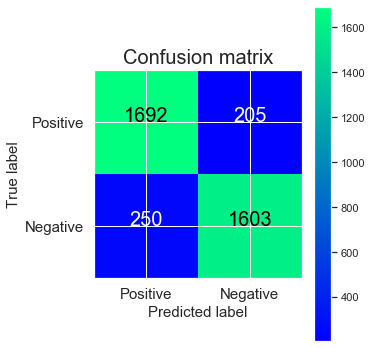

In [27]:
model_count_tfidf(LogisticRegression,X_train, y_train, X_val, y_val)

In [30]:
important_features(CountVectorizer,LogisticRegression,10,X_train,y_train)

Classifier is LogisticRegression()
Top 10 negative words: ('waste', 2.2221700761080005)
Top 10 negative words: ('poorly', 2.1650109195950207)
Top 10 negative words: ('worst', 2.111276924347132)
Top 10 negative words: ('disappointment', 2.080307688837293)
Top 10 negative words: ('disappointing', 1.919851934058497)
Top 10 negative words: ('awful', 1.9069187730665207)
Top 10 negative words: ('forgettable', 1.8931400736894834)
Top 10 negative words: ('alright', 1.6772937783855273)
Top 10 negative words: ('uninteresting', 1.5978532771815503)
Top 10 negative words: ('dull', 1.5898582061969169)


Top 10 positive words: ('refreshing', -1.687262370429714)
Top 10 positive words: ('flawless', -1.4352335616255765)
Top 10 positive words: ('rare', -1.3975009895267898)
Top 10 positive words: ('criticism', -1.3812851704774005)
Top 10 positive words: ('wonderful', -1.3399813597849524)
Top 10 positive words: ('scariest', -1.3368950165621218)
Top 10 positive words: ('wonderfully', -1.2911191686652754)
To

The classifier is MultinomialNB() 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1897
           1       0.87      0.86      0.86      1853

    accuracy                           0.87      3750
   macro avg       0.87      0.86      0.87      3750
weighted avg       0.87      0.87      0.87      3750



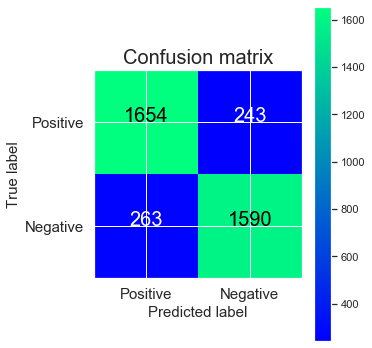

In [31]:
model_count_tfidf(MultinomialNB,X_train, y_train, X_val, y_val)

In [32]:
important_features(CountVectorizer,MultinomialNB,10,X_train,y_train)

Classifier is MultinomialNB()
Top 10 negative words: ('movie', -3.856005247291632)
Top 10 negative words: ('film', -4.08898801117348)
Top 10 negative words: ('nt', -4.194989044661286)
Top 10 negative words: ('one', -4.69510359454584)
Top 10 negative words: ('like', -4.797108733523588)
Top 10 negative words: ('would', -5.155897098467349)
Top 10 negative words: ('good', -5.223166189542182)
Top 10 negative words: ('time', -5.223166189542182)
Top 10 negative words: ('bad', -5.251083872628353)
Top 10 negative words: ('character', -5.255553805248226)


Top 10 positive words: ('aa', -13.799194166679312)
Top 10 positive words: ('aadha', -13.799194166679312)
Top 10 positive words: ('aapkey', -13.799194166679312)
Top 10 positive words: ('aardvark', -13.799194166679312)
Top 10 positive words: ('aaww', -13.799194166679312)
Top 10 positive words: ('abatement', -13.799194166679312)
Top 10 positive words: ('abating', -13.799194166679312)
Top 10 positive words: ('abbey', -13.799194166679312)
Top 10 po

As we can see, the LR model gives a better result that the NB model. (88% vs 86%).

When we check the top 10 important words for each type of reviews (posivite and negative), we note that the LR model choose quite correctly the words that relate to the relevant type of review (worst, dispointing,... for negavite review and funiest, excellent,... for positive review).
Au contraire, the top 10 words from NB model do not correspond to the relevant type of comments and there are some meaningless words have been choosen by this model.

Thus, LR is now the best model.

## Bigrams Modeling

As explained above, we previously ran unigram models which examine only separate words. In this par, we will use bigrams which is a technique used with vectorizer to examine not only separate words but also two words sequences.

We will try this technique and see if the performance of our models would be better.

In [33]:
#Create bigram function giving scores and confusion metric
def model_bigrams(classifier, X_train, y_train, X_val, y_val):
    #We add the parameter of ngram in the CountVectorizer()
    pipe = Pipeline([
    ('bow',CountVectorizer(ngram_range = (1,2))),
    ('tfidf',TfidfTransformer()),
    ('classifier',classifier())])

    pipe.fit(X_train,y_train)
    pred = pipe.predict(X_val)
    cm = confusion_matrix(y_val,pred)


    print(f'The classifier is {classifier()}','\n')
    print(classification_report(y_val,pred))
    
    fig = plt.figure(figsize=(5, 5))
    plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, title='Confusion matrix')
    plt.show()

In [37]:
def important_features_bigram(vectorizer,classifier,nb_top,X_train,y_train):
    # Create the vectorizer, classifier and fit into train set
    vector = vectorizer(ngram_range = (1,2))
    vector.fit(X_train,y_train)
    X_train_vecto = vector.transform(X_train)
    model = classifier()
    model.fit(X_train_vecto,y_train)
    
    print(f'Classifier is {classifier()}')
    
    #Create the dictionary with key = word, value = coefficience corresponding to this word
    feature_to_coef = {word: coef for word, coef in zip(vector.get_feature_names(), model.coef_[0])}
    
    #Print top positive and negative words
    for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1],reverse=True)[:nb_top]:
        print (f'Top {nb_top} negative words:',best_positive)
    print('\n')
    for best_negative in sorted(feature_to_coef.items(),key=lambda x: x[1])[:nb_top]:
        print (f'Top {nb_top} positive words:',best_negative)

The classifier is LogisticRegression() 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1897
           1       0.89      0.86      0.87      1853

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750



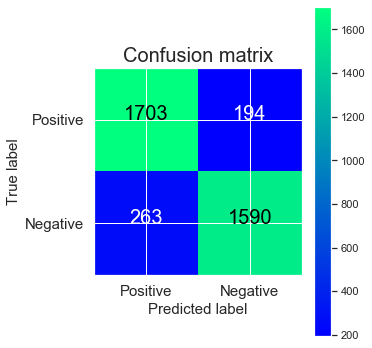

In [35]:
model_bigrams(LogisticRegression,X_train, y_train, X_val, y_val)

In [38]:
important_features_bigram(CountVectorizer,LogisticRegression,10,X_train,y_train)

Classifier is LogisticRegression()
Top 10 negative words: ('worst', 1.9668343112299769)
Top 10 negative words: ('waste', 1.7720293593408745)
Top 10 negative words: ('awful', 1.7286560608640278)
Top 10 negative words: ('boring', 1.5178110986549171)
Top 10 negative words: ('disappointing', 1.4858672336487582)
Top 10 negative words: ('dull', 1.4010324028249517)
Top 10 negative words: ('poorly', 1.3847581988930062)
Top 10 negative words: ('disappointment', 1.335698153687559)
Top 10 negative words: ('horrible', 1.3053031680857972)
Top 10 negative words: ('poor', 1.1638305016402986)


Top 10 positive words: ('wonderful', -1.3216391757151225)
Top 10 positive words: ('perfect', -1.2052851364849821)
Top 10 positive words: ('excellent', -1.196141900782328)
Top 10 positive words: ('amazing', -1.0555019508640033)
Top 10 positive words: ('favorite', -0.9878278947547069)
Top 10 positive words: ('enjoyed', -0.9849761008111848)
Top 10 positive words: ('superb', -0.9716714964375079)
Top 10 positive wor

The classifier is MultinomialNB() 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1897
           1       0.87      0.88      0.88      1853

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750



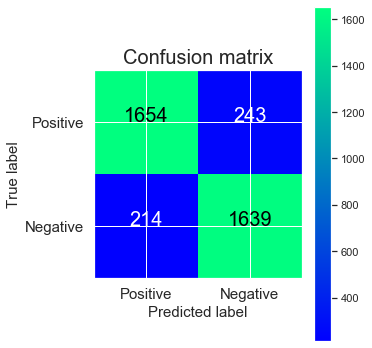

In [39]:
model_bigrams(MultinomialNB,X_train, y_train, X_val, y_val)

In [40]:
important_features_bigram(CountVectorizer,MultinomialNB,10,X_train,y_train)

Classifier is MultinomialNB()
Top 10 negative words: ('movie', -4.960625308880898)
Top 10 negative words: ('film', -5.193608072762746)
Top 10 negative words: ('nt', -5.299609106250552)
Top 10 negative words: ('one', -5.7997236561351055)
Top 10 negative words: ('like', -5.901728795112854)
Top 10 negative words: ('would', -6.260517160056615)
Top 10 negative words: ('good', -6.327786251131448)
Top 10 negative words: ('time', -6.327786251131448)
Top 10 negative words: ('bad', -6.355703934217619)
Top 10 negative words: ('character', -6.360173866837492)


Top 10 positive words: ('aa', -14.903814228268578)
Top 10 positive words: ('aa uo', -14.903814228268578)
Top 10 positive words: ('aadha', -14.903814228268578)
Top 10 positive words: ('aadha shaadi', -14.903814228268578)
Top 10 positive words: ('aapkey', -14.903814228268578)
Top 10 positive words: ('aapkey finished', -14.903814228268578)
Top 10 positive words: ('aardvark', -14.903814228268578)
Top 10 positive words: ('aardvark get', -14.9038

By using bigram as the parameter in the vectorizer, we simply considered 2-word sequences in addition to single words. The accuracy score does not change much for both models.

By looking at the list of top 10 important words, we can see that there are several 2 word sequences. For example,'culturedeeply', 'neardangerous'  in the list of positive words of the NB model or 'welldiscussed', 'womennone' in the list of the positive words of the LR model.
These words do not really show whether the review is positive or negative. Even the seperate words do not really correspond to the type of   In addition to this, we can see that the coefficience of the words in the LR model has dropped dramatically for all the top 10 words. 

As for the model NB, even the score increases slightly compared to the one of the unigram model, it does not perform as good as the LR model.

Thus, the bigram does not has a positive impact on the performance of the models.

## Modeling with Convolutional Neural Network - Deep learning

In [41]:
df_clean.head()

,text,sentiment,text_clean
0,For a movie that gets no respect there sure ar...,0,movie get respect sure lot memorable quote lis...
1,Bizarre horror movie filled with famous faces ...,0,horror movie filled famous face stolen later p...
2,"A solid, if unremarkable film. Matthau, as Ein...",0,solid unremarkable film wonderful favorite par...
3,It's a strange feeling to sit alone in a theat...,0,strange feeling sit alone theater occupied par...
4,"You probably all already know this by now, but...",0,probably already know additional episode never...


In [42]:
X_train.head()

18227    fan movie aware since release little bit would...
7035     good first movie good solid movie good car cha...
18307    movie exactly expected great also bad either o...
11677    hard top movie several way work really well ca...
314      movie long awaited release bit disappointing e...
Name: text_clean, dtype: object

##### Step 1:  Build training vocabulary and get maximum training sentence length and total number of words training, validation and test data

**For train set**

In [43]:
#Create a serie of words from the X_train
lst_word_train = X_train.map(lambda x: x.split(' '))

In [44]:
lst_word_train

18227    [fan, movie, aware, since, release, little, bi...
7035     [good, first, movie, good, solid, movie, good,...
18307    [movie, exactly, expected, great, also, bad, e...
11677    [hard, top, movie, several, way, work, really,...
314      [movie, long, awaited, release, bit, disappoin...
                               ...                        
9256     [film, huge, impact, moved, amazing, story, gi...
5746     [title, come, proverb, film, play, like, trage...
4796     [interesting, director, peer, genre, like, pic...
14561    [going, disagree, previous, comment, side, one...
3011     [absolutely, spellbinding, series, sorry, able...
Name: text_clean, Length: 18750, dtype: object

In [45]:
#Build training vocabulary and get maximum training sentence length and total number of words training data
all_training_words = [word for tokens in lst_word_train for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in lst_word_train]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

1879200 words total, with a vocabulary size of 48337
Max sentence length is 891


In [46]:
#Use counter to map words to their count number
counter_vocab_train = Counter(all_training_words)

In [47]:
print(counter_vocab_train.most_common(50))

[('movie', 37162), ('film', 34649), ('nt', 24893), ('one', 18438), ('like', 14594), ('time', 11191), ('good', 10660), ('character', 10320), ('would', 9908), ('story', 9409), ('get', 9104), ('make', 8725), ('see', 8558), ('really', 8493), ('even', 8189), ('scene', 7706), ('much', 7051), ('could', 6932), ('people', 6649), ('bad', 6500), ('great', 6300), ('way', 6223), ('well', 6092), ('show', 6080), ('made', 5993), ('first', 5919), ('also', 5892), ('thing', 5864), ('think', 5669), ('life', 5402), ('go', 5300), ('know', 5163), ('watch', 4919), ('actor', 4919), ('seen', 4894), ('plot', 4890), ('say', 4844), ('end', 4841), ('two', 4777), ('year', 4724), ('many', 4703), ('look', 4666), ('acting', 4650), ('never', 4604), ('love', 4520), ('little', 4498), ('best', 4307), ('ever', 4203), ('better', 4198), ('work', 4150)]


**For val set**

In [48]:
#Create a serie of words from the X_val
lst_word_val = X_val.map(lambda x: x.split(' '))

In [49]:
#Build training vocabulary and get maximum training sentence length and total number of words validation data
all_val_words = [word for tokens in lst_word_val for word in tokens]
val_sentence_lengths = [len(tokens) for tokens in lst_word_val]
VAL_VOCAB = sorted(list(set(all_val_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_val_words), len(VAL_VOCAB)))
print("Max sentence length is %s" % max(val_sentence_lengths))

378657 words total, with a vocabulary size of 23296
Max sentence length is 754


In [50]:
#Use counter to map words to their count number
counter_vocab_val = Counter(all_val_words)

**For test set**

In [51]:
#Create a serie of words from the X_val
lst_word_test = X_test.map(lambda x: x.split(' '))

In [52]:
#Build training vocabulary and get maximum training sentence length and total number of words validation data
all_test_words = [word for tokens in lst_word_test for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in lst_word_test]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

247413 words total, with a vocabulary size of 19515
Max sentence length is 738


In [53]:
#Use counter to map words to their count number
counter_vocab_test = Counter(all_test_words)

##### Step 2: Loading Google News Word2Vec model

In [54]:
word2vec_path = 'D:/Documents/Ironhack/Projet 7/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [55]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, X, generate_missing=False):
    embeddings = X.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [56]:
training_embeddings = get_word2vec_embeddings(word2vec, lst_word_train, generate_missing=True)


In [57]:
len(training_embeddings)

18750

##### Step 3: Tokenize and Pad sequences

In [58]:
#Determine the max_sequence length for the whole dataset. 
MAX_SEQUENCE_LENGTH = max(training_sentence_lengths) #We use the max sentence length of train dataset because as we can see above, it is the highest value among train, validation, test sets 

#Define the embedding dimension
EMBEDDING_DIM = 300 #can be adjusted (Eg: 100, 150, 50)

**Tokenize and pad sequences for train set**

In [59]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(lst_word_train)
training_sequences = tokenizer.texts_to_sequences(lst_word_train)

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 48337 unique tokens.


In [60]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [61]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(48338, 300)


As we can see, 48279 is the vocabulary size of train set, and 300 is the embedding dimension defined at the begining of step 3

**Tokenize and pad sequences for validation set**

In [62]:
val_sequences = tokenizer.texts_to_sequences(lst_word_val)
val_cnn_data = pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH) 

**Tokenize and pad sequences for test set**

In [63]:
test_sequences = tokenizer.texts_to_sequences(lst_word_test)
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) 

##### Step 4: Define CNN

In [64]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(1, activation='sigmoid')(x) #1 because we only have 1 column in the Y dataset

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [65]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 891)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 891, 300)     14501400    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 890, 200)     120200      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 889, 200)     180200      embedding[0][0]                  
_______________________________________________________________________________________

##### Step 5 Train CNN

In [66]:
num_epochs = 3
batch_size = 34

In [67]:
hist = model.fit(train_cnn_data, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)


Epoch 1/3
497/497 [==============================] - 467s 940ms/step - loss: 0.4285 - acc: 0.7961 - val_loss: 0.2834 - val_acc: 0.8789
Epoch 2/3
497/497 [==============================] - 447s 899ms/step - loss: 0.2620 - acc: 0.8916 - val_loss: 0.2569 - val_acc: 0.8885
Epoch 3/3
497/497 [==============================] - 440s 885ms/step - loss: 0.1508 - acc: 0.9458 - val_loss: 0.3711 - val_acc: 0.8640


##### Step 6 Val CNN

In [1]:
val_predictions = model.predict(val_cnn_data, batch_size=1024, verbose=1)

NameError: name 'model' is not defined

In [ ]:
# pipeNB = Pipeline([
#     ('bow',CountVectorizer()),
#     ('tfidf',TfidfTransformer()),
#     ('classifier',MultinomialNB())])

# pipeNB.fit(X_train,y_train)


cv = KFold(n_splits=5, shuffle=True, random_state = 42)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(C=c))])
    
    scores = cross_val_score(pipe, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print (f"Accuracy for C = {c}:", np.mean(scores))